# 5.1 Game map analysis tests

In [1]:
%run "../Functions/5. Game map analysis.ipynb"

C:\Users\Mikael\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2902: DtypeWarning: Columns (18,21,22,28,32,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Mikael\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2902: DtypeWarning: Columns (14,15,16,17,18,20,21,22,25,26,27,30,33,34,35,36,37,38,39,40,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Function tests

In [2]:
allTypes = rdf152['type'].dropna().unique()

types = ["death", "reach", "add", "craft", "remove", "select", "selectmenu"]
craftTypes = ["add", "craft", "remove", "select"]
gameTypes = ["hint", "pickup", "newfurthest", "newownrecord", "configure", "end", "complete", "restart", "start"]
webTypes = ["gotostudy", "gotomooc"]
adminTypes = ["switchtogameversion", "switchfromgameversion", "webconfigure"]

In [3]:
allTypes

array(['start', 'selectmenu', 'add', 'switchfromgameversion', 'craft',
       'select', 'remove', 'death', 'reach', 'pickup', 'newfurthest',
       'newownrecord', 'configure', 'end', 'restart',
       'switchtogameversion', 'gotourl', 'hint', 'gotostudy', 'complete',
       'gotomooc', 'webconfigure'], dtype=object)

### WARNING: very long test

In [4]:
allLocatedEventsDF = filterAndLocateEvents(allTypes)

locatedEventsDF = filterAndLocateEvents(types)

craftLocatedEventsDF = filterAndLocateEvents(craftTypes)

gameLocatedEventsDF = filterAndLocateEvents(gameTypes)

webLocatedEventsDF = filterAndLocateEvents(webTypes)

adminLocatedEventsDF = filterAndLocateEvents(adminTypes)

In [5]:
len(allLocatedEventsDF)

73569

In [6]:
print("minX=" + str(min(allLocatedEventsDF['x'])))
print("maxX=" + str(max(allLocatedEventsDF['x'])))
print("minY=" + str(min(allLocatedEventsDF['y'])))
print("maxY=" + str(max(allLocatedEventsDF['y'])))

minX=-1152
maxX=539
minY=-1161
maxY=-100


In [7]:
type(min(allLocatedEventsDF['x']))

int

In [8]:
#allLocatedEventsDF['x'].value_counts()

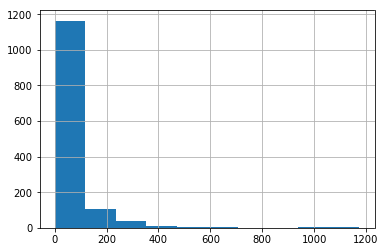

In [9]:
allLocatedEventsDF['x'].value_counts().hist()

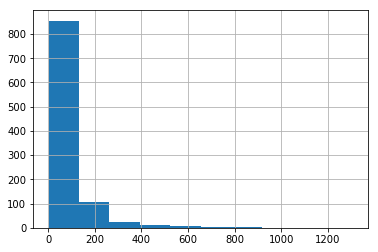

In [10]:
allLocatedEventsDF['y'].value_counts().hist()

### Plots

In [105]:
%run "../Functions/5. Game map analysis.ipynb"

C:\Users\Mikael\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2902: DtypeWarning: Columns (18,21,22,28,32,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Mikael\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2902: DtypeWarning: Columns (14,15,16,17,18,20,21,22,25,26,27,30,33,34,35,36,37,38,39,40,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [106]:
constants = getConstants()
constants

scaleX        1.358000
scaleY       -1.357143
offsetX   -1360.214000
offsetY     -21.714286
dtype: float64

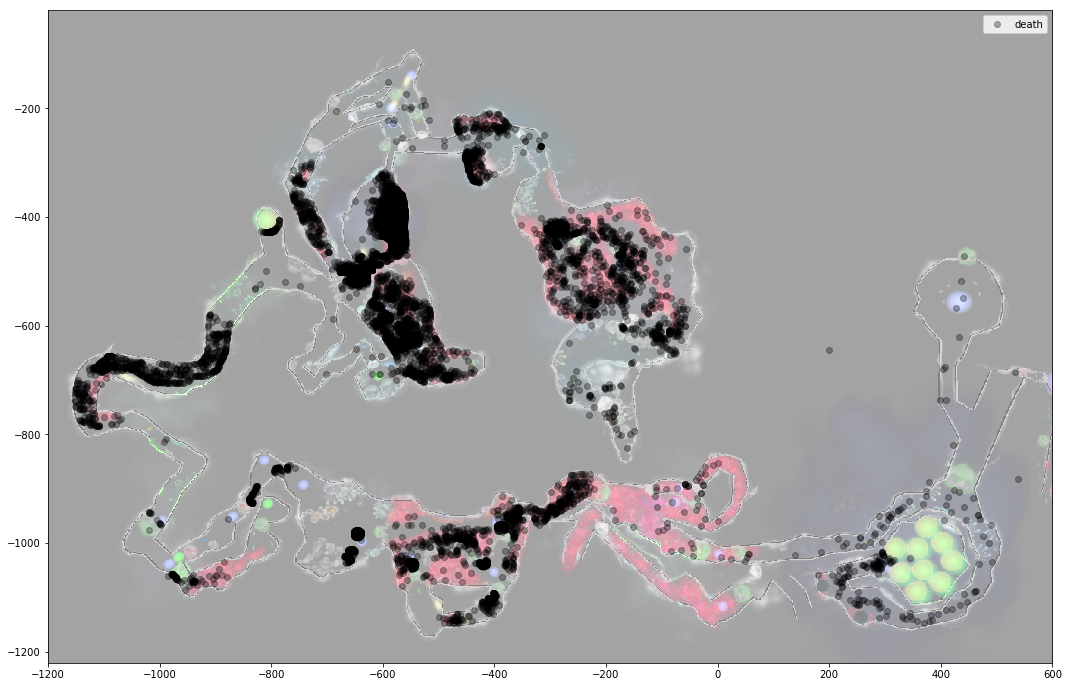

In [107]:
plotLocatedEvents(allLocatedEventsDF, ['death'])

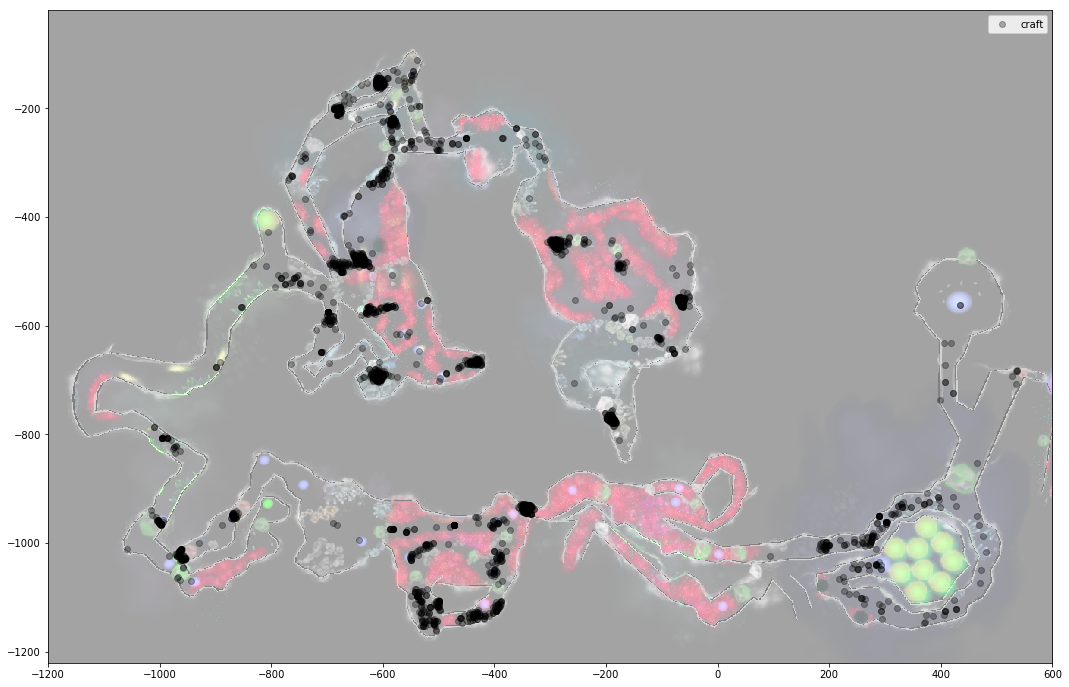

In [108]:
plotLocatedEvents(allLocatedEventsDF, ['craft'])

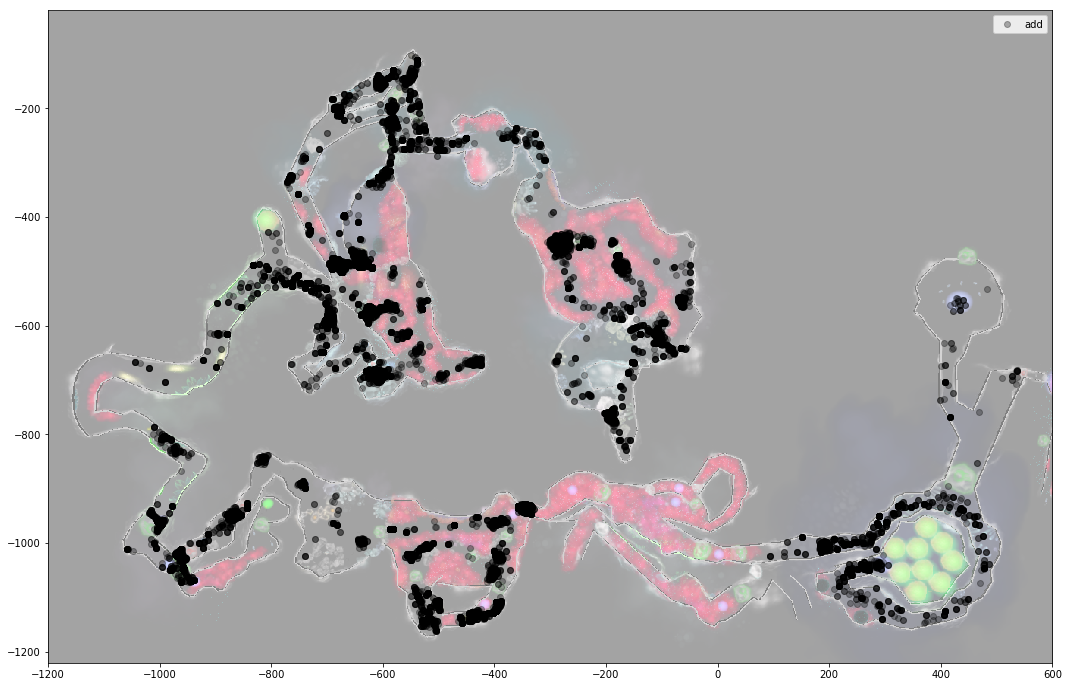

In [142]:
plotLocatedEvents(allLocatedEventsDF, ['add'])

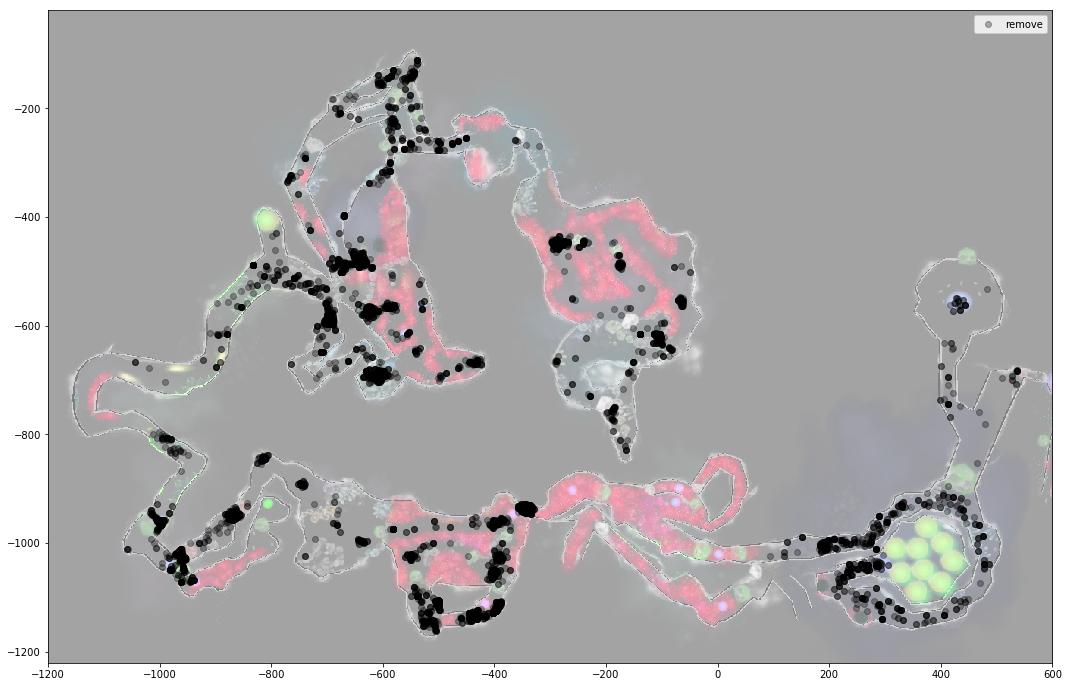

In [143]:
plotLocatedEvents(allLocatedEventsDF, ['remove'])

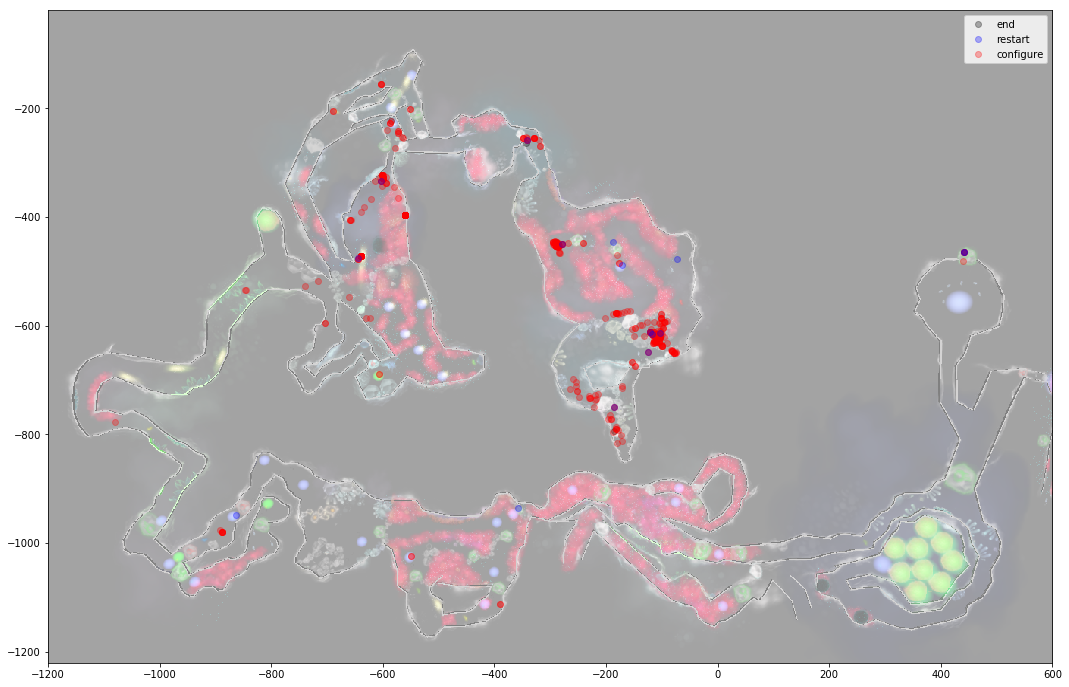

In [109]:
plotLocatedEvents(allLocatedEventsDF, ['end', 'configure', 'restart'])

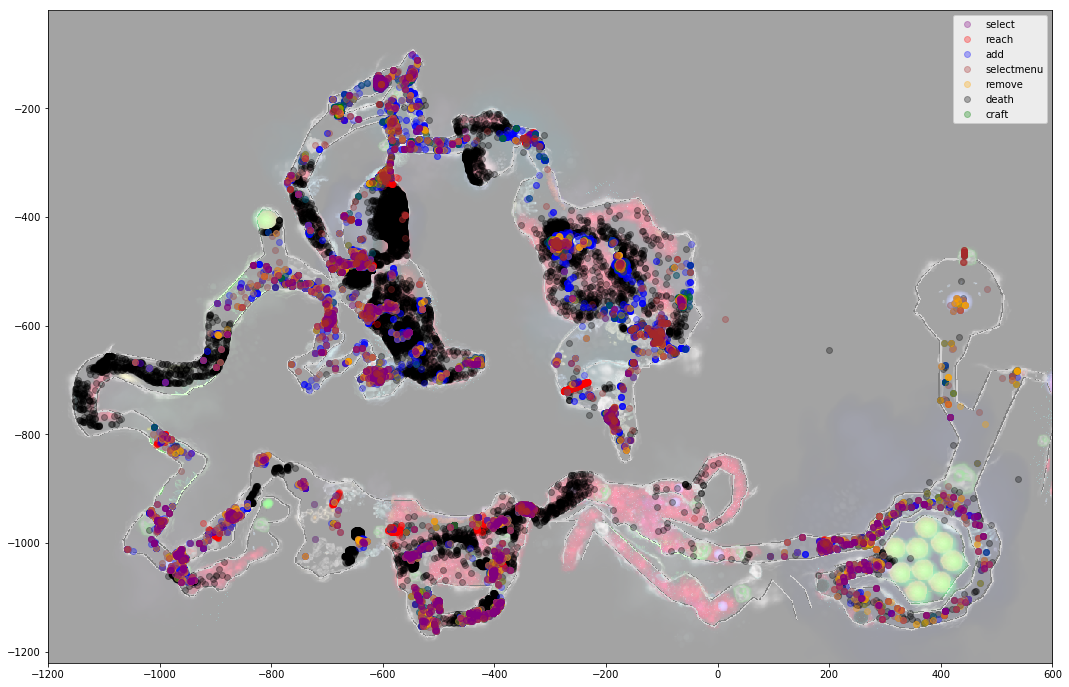

In [110]:
plotLocatedEvents(allLocatedEventsDF, types)

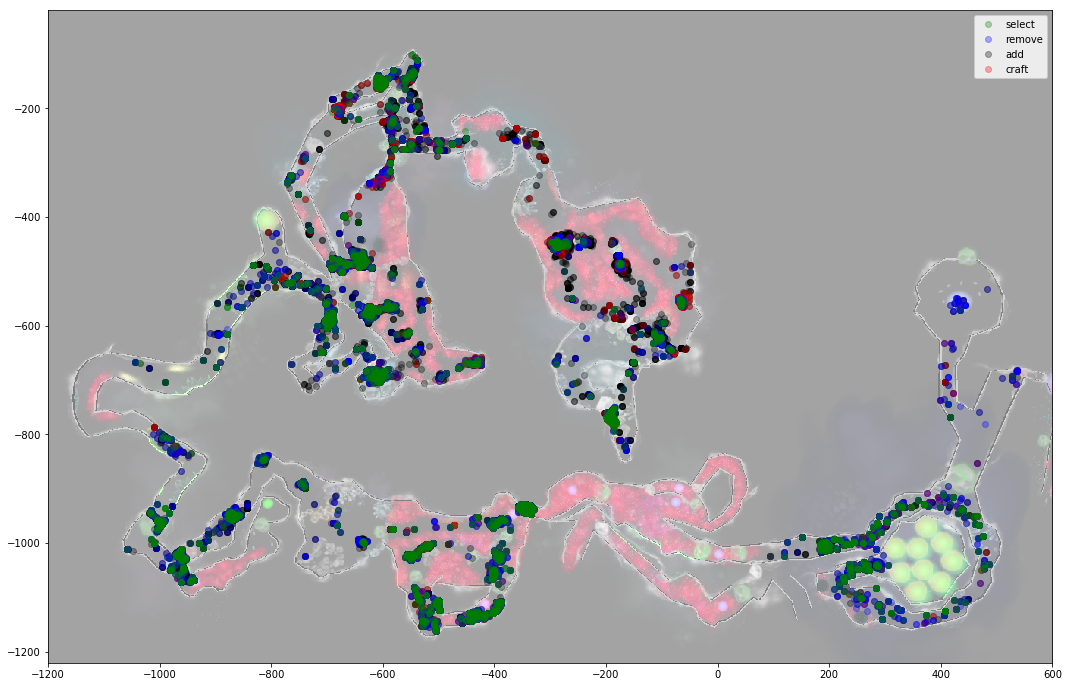

In [111]:
plotLocatedEvents(allLocatedEventsDF, craftTypes)

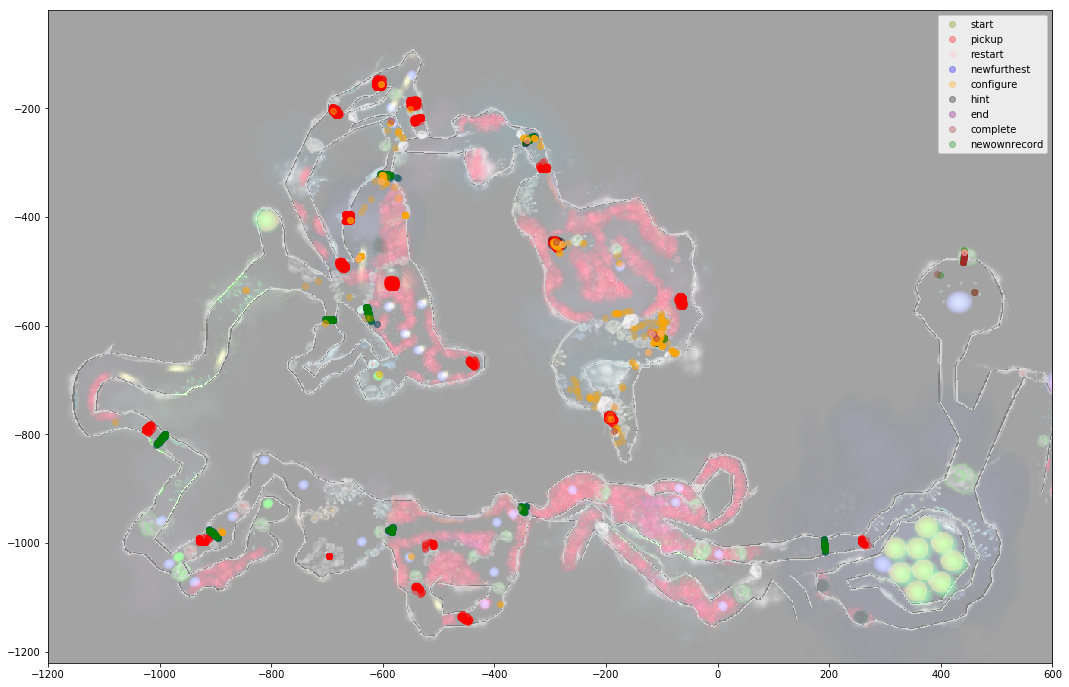

In [112]:
plotLocatedEvents(allLocatedEventsDF, gameTypes)

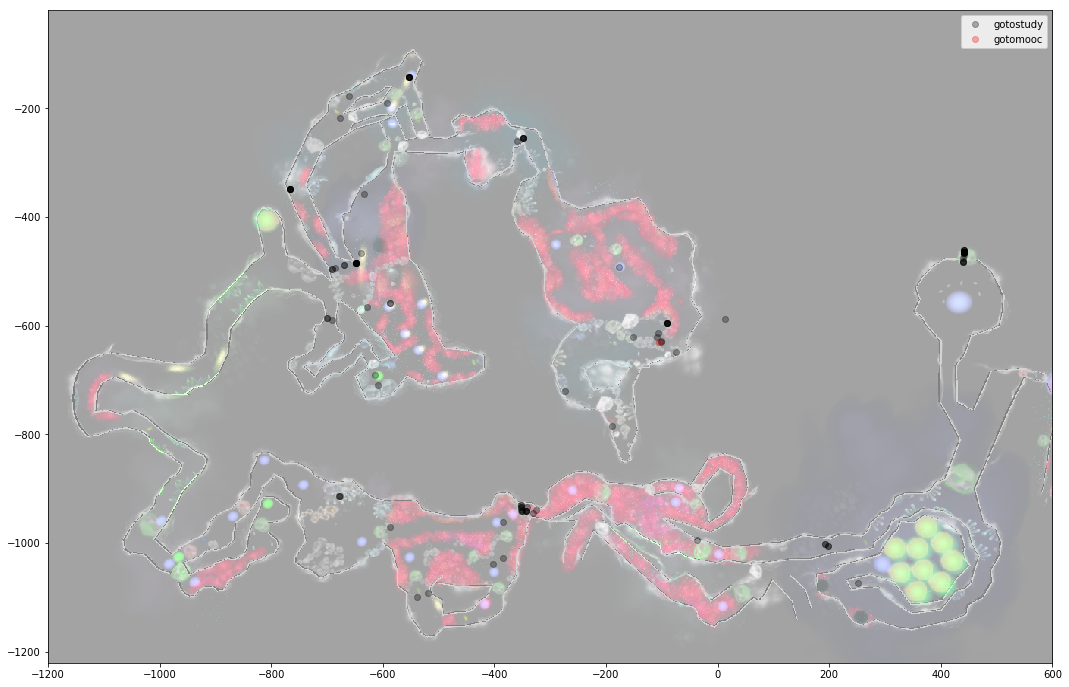

In [113]:
plotLocatedEvents(allLocatedEventsDF, webTypes)

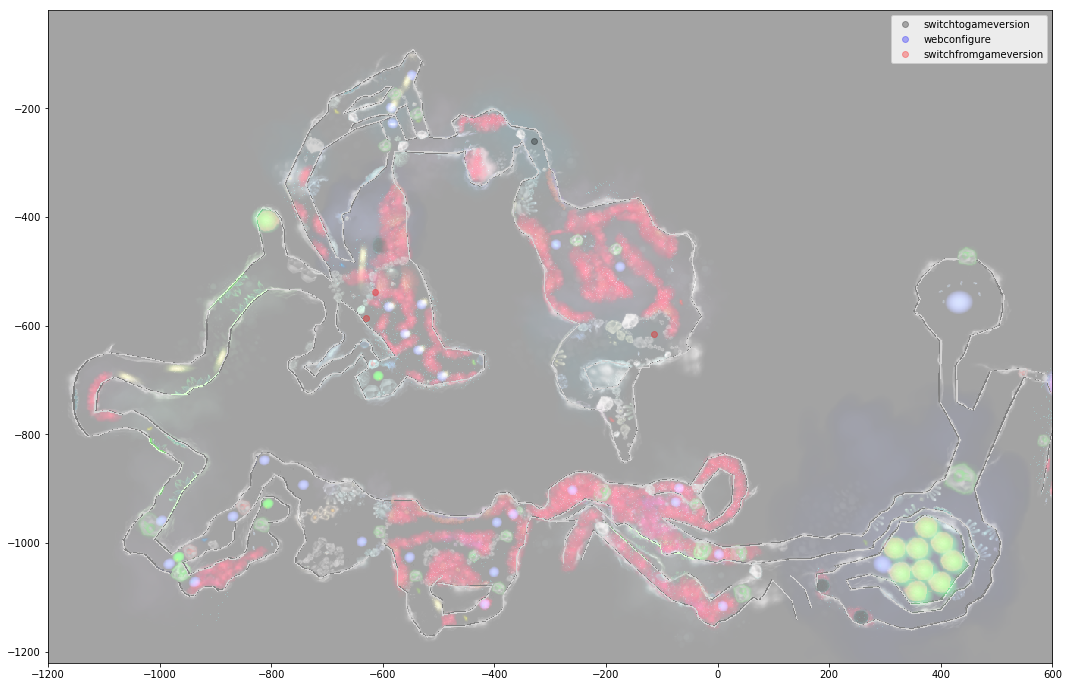

In [114]:
plotLocatedEvents(allLocatedEventsDF, adminTypes)

## Tinkering

### filterAndLocateEvents

In [115]:
rdf152.columns

Index(['id', 'serverTime', 'userTime', 'gameVersion', 'playerId',
       'playerBirthdate', 'playerRegion', 'playerCountry', 'playerGender',
       'playerExternalId', 'playerCustomData', 'type', 'coordinates',
       'section', 'customData.biobrick', 'customData.devices',
       'customData.slot', 'customData.sound', 'customData',
       'customData.duration', 'customData.nanobot', 'customData.language',
       'customData.controls', 'customData.chapter', 'customData.life',
       'customData.source', 'customData.platform',
       'customData.localplayerguid', 'customData.sametab', 'customData.device',
       'customData.energy', 'customData.option', 'customData.newtab',
       'customData.dnabit', 'customData.count', 'customData.plasmid',
       'customData.total', 'customData.message', 'customData.graphics'],
      dtype='object')

In [116]:
#rdf152['customData.chapter'].dropna().head()

#### Filter columns

In [117]:
mapRelevantColumns = ['type', 'section', 'coordinates']
mapDF = rdf152.loc[:,mapRelevantColumns]
len(mapDF)

82915

In [118]:
mapDF = mapDF.dropna()
len(mapDF)

75601

#### Filter by event type

In [119]:
mapDF = mapDF[mapDF["type"].isin(types)]
mapDF.head()

type                 section   coordinates
10   reach  tutorial1.Checkpoint00  [-259, -713]
11   death  tutorial1.Checkpoint00  [-259, -713]
12   death  tutorial1.Checkpoint00  [-264, -708]
14  select  tutorial1.Checkpoint00  [-192, -767]
15   craft  tutorial1.Checkpoint00  [-192, -767]

#### Filter by section

In [120]:
tutorial1DF = mapDF[(mapDF['section'].str.startswith('tutorial1'))]
#sandbox2DF = mapDF[(mapDF['section'].str.startswith('sandbox'))]
tutorial1DF.head(2)

type                 section   coordinates
10  reach  tutorial1.Checkpoint00  [-259, -713]
11  death  tutorial1.Checkpoint00  [-259, -713]

In [121]:
len(tutorial1DF)

62996

#### [x,y] coordinates

In [122]:
tutorial1DF['x'] = tutorial1DF['coordinates']
tutorial1DF['y'] = tutorial1DF['coordinates']

C:\Users\Mikael\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Mikael\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [123]:
tutorial1DF.head(2)

type                 section   coordinates             x             y
10  reach  tutorial1.Checkpoint00  [-259, -713]  [-259, -713]  [-259, -713]
11  death  tutorial1.Checkpoint00  [-259, -713]  [-259, -713]  [-259, -713]

In [124]:
m = re.findall('-*\d+', '[-259, -713]')
m

['-259', '-713']

In [125]:
coordinates = re.findall('-*\d+', tutorial1DF['coordinates'][10])
coordinates

['-259', '-713']

In [126]:
subsetCount = 100
subset = tutorial1DF.head(subsetCount)
subset.index = range(0, subsetCount)

In [127]:
f = FloatProgress(min=0, max=len(subset.index))
display(f)

for index in subset.index:
    coordinates = re.findall('-*\d+', subset['coordinates'][index])
    subset['x'][index] = coordinates[0]
    subset['y'][index] = coordinates[1]
    f.value += 1

C:\Users\Mikael\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3066: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [128]:
subset.head(2)

type                 section   coordinates     x     y
0  reach  tutorial1.Checkpoint00  [-259, -713]  -259  -713
1  death  tutorial1.Checkpoint00  [-259, -713]  -259  -713

In [129]:
types

['death', 'reach', 'add', 'craft', 'remove', 'select', 'selectmenu']

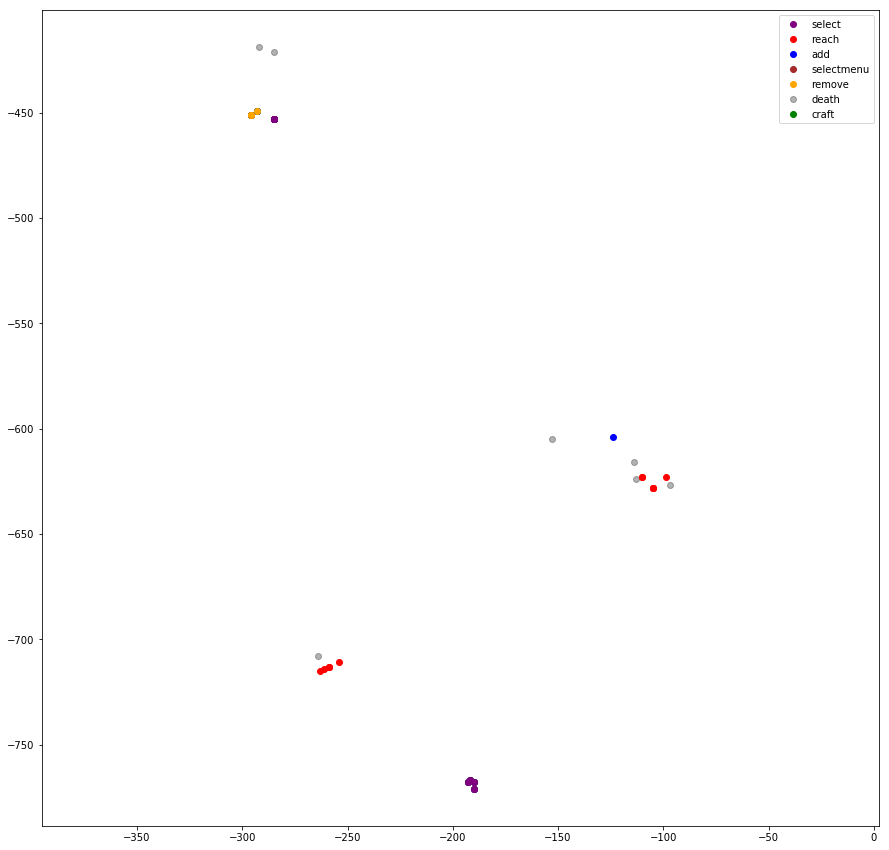

In [130]:
plt.figure(figsize=(15,15))
plt.axis('equal')

# c = ["black", "red", "blue", "green"]
c = ['black', 'red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'olive', 'cyan', ]
# a = [ 0.3, 1, 1,1 ]
a = [ 0.3, 1, 1, 1, 1, 1, 1, 1, 1, 1, ]

scatters = {}

for i, t in enumerate(types):
  pts = subset[subset["type"] == t]
  x = pts["x"]
  y = pts["y"]

  scatters[t] = plt.plot(x, y, 'o', c=c[i], lw=0, alpha=a[i])

plt.legend([ x[0] for x in scatters.values()], scatters.keys())
plt.show()

In [131]:
_mapBackground = image.imread('../../images/map.png')

In [132]:
type(_mapBackground)

numpy.ndarray

In [133]:
len(_mapBackground)

1023

In [134]:
len(_mapBackground[0])

995

In [135]:
_mapBackground.shape

(1023, 995, 3)

In [136]:
#types = allTypes
subset = allLocatedEventsDF

In [137]:
allLocatedEventsDF[allLocatedEventsDF['type'] == 'complete'].head(5)

type                 section    x     y
1178  complete  tutorial1.Checkpoint14  441  -472
2881  complete  tutorial1.Checkpoint14  441  -478
2883  complete  tutorial1.Checkpoint14  441  -472
3618  complete  tutorial1.Checkpoint14  441  -473
6045  complete  tutorial1.Checkpoint14  441  -473

In [138]:
imgStartCoordinates = [833,432]
imgEndCoordinates = [1333,334]
constants = getConstants()
    
print(getGraphPosition(imgStartCoordinates, constants))
print(getGraphPosition(imgEndCoordinates, constants))

[-229.0, -608.0]
[450.0, -475.0]


In [139]:
# from image dimensions
print(getXGraphPosition(0, constants))
print(getXGraphPosition(1665, constants))
print(getYGraphPosition(890, constants))
print(getYGraphPosition(0, constants))

-1360.214
900.856
-1229.57142857
-21.7142857143


### getConstants tinkering

In [140]:
gameStartCoordinates = [-229,-608]
gameEndCoordinates = [450,-475]

# only for '../../images/map.tutorial1.png'
imgStartCoordinates = [833,432]
imgEndCoordinates = [1333,334]

scaleX = (gameStartCoordinates[0]-gameEndCoordinates[0])/(imgStartCoordinates[0]-imgEndCoordinates[0])
scaleY = (gameStartCoordinates[1]-gameEndCoordinates[1])/(imgStartCoordinates[1]-imgEndCoordinates[1])

offsetX = gameStartCoordinates[0] - (imgStartCoordinates[0]*scaleX)
offsetY = gameStartCoordinates[1] - (imgStartCoordinates[1]*scaleY)

newConstants = pd.Series([scaleX,scaleY,offsetX,offsetY], index=['scaleX', 'scaleY', 'offsetX', 'offsetY'])

### plotLocatedEvents tinkering

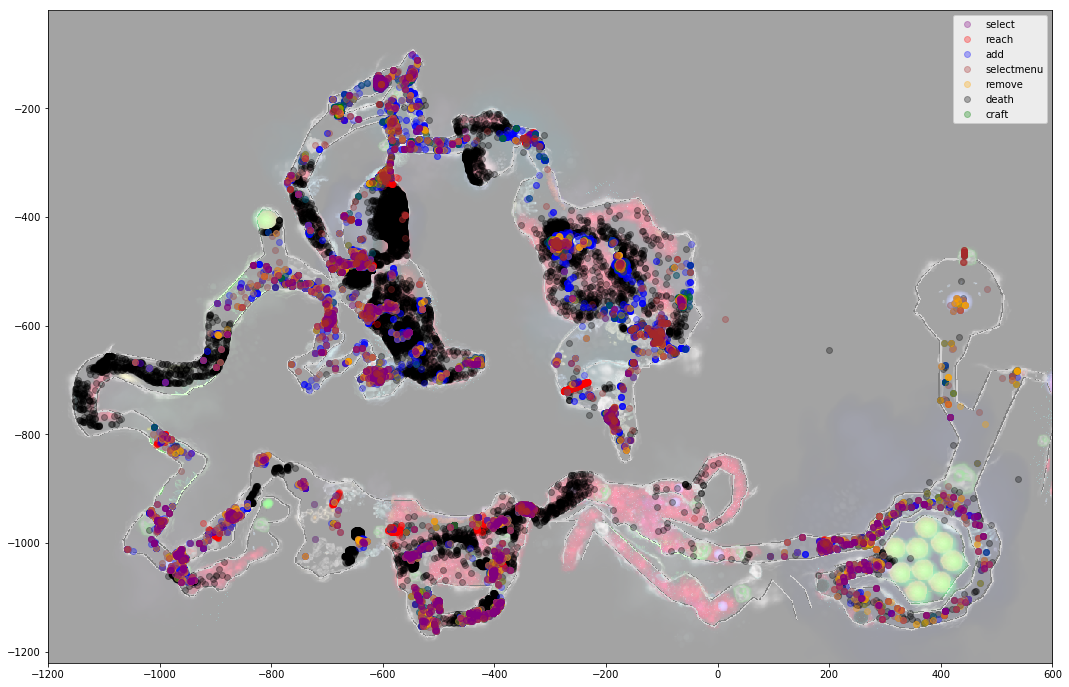

In [141]:
#constants = getConstants()
constants = newConstants

plt.figure(figsize=(18,12))

# background map image display
mapBackground = image.imread('../../images/map.tutorial1.png')

# background image dimensions
minX = 0
maxX = mapBackground.shape[1]
minY = mapBackground.shape[0]
maxY = 0

plt.imshow(mapBackground, aspect='auto', zorder=-1, \
           extent=(getXGraphPosition(minX,constants), \
                   getXGraphPosition(maxX,constants), \
                   getYGraphPosition(minY,constants), \
                   getYGraphPosition(maxY,constants)), \
           alpha=0.5)


colors = ['black', 'red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'olive', 'cyan', ]
alphas = [ 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, ]
scatters = {}

for i, t in enumerate(types):
  pts = subset[subset['type'] == t]
  x = pts['x']
  y = pts['y']

  scatters[t] = plt.plot(x, y, 'o', c=colors[i], lw=0, alpha=alphas[i])

plt.legend([ x[0] for x in scatters.values()], scatters.keys())

# graph dimensions and extrema on tutorial1
# minX=-1152
# maxX=539
# minY=-1161
# maxY=-100
plt.xlim([-1200, 600])
plt.ylim([-1220, -20])

plt.show()